Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>

# Decision Trees

## Contents

- What are Decision trees
- Implementation
- Visualization
- Gini Index
- Decision Trees for Regression


### What are Decision Trees

Let me take you back to the number guessing game that we have played on day 1 of the course. It is a simple game where the computer chooses a random number between 1 and 100 and you have to guess the number. After each guess, the program helps you by telling if your guess is higher or lower than the chosen number. Say the number chosen is 60. Let's visualize this.

<img src="./pics/number-guessing-game-visual.png"/>

Basically, it is a series of decisions based on the clue you get from the program. For lack of a better intelligence, we just predict the middle number on either side ( higher or lower ). We can think of the same process using a decision tree.

<img src="./pics/decision-tree-guessing-game.png"/>

A decision tree is essentially a series of decisions that are based on the data you are working with. For example, if you are guessing a number between 1 and 1000, the decision tree would have been much bigger. In this case, the guesses (cuts in the number line) are exactly in the middle - for lack of a better guessing method. However, a real decision tree makes a much more informed decision. Once again, let me show this with a simple example. 

Take an apple that is rotten somewhere at the side. 

<img src="./pics/decision-tree-rotten-apple.png"/>

Our goal is to find a series of cuts that maximises the fresh apple portion (and minimizes the rotten portion) with the least possible cuts. How would you do it ?

<img src="./pics/decision-trees-apple-cuts.png"/>

Something like this - The criteria you would be using to make the cuts is based on the maximum area(volume) that you can carve off that is not rotten. 

Decision trees also work the same way. For example, let's take the iris dataset. To make things simple, let's just focus on 
- setosa and versicolor
- sepal length and sepal width.

<img src="./pics/iris-setosa-versicolor.png"/>

If you are asked to carve out one species from another using just horizontal and vertical lines, how would you do it ? It's not an easy job to do it efficiently. Probably, we would do it something like this. 


<img src="./pics/iris-manual-decision-tree.png"/>

What were we basing our decisions (cut-off points) on ? Visually, we were essentially eye-balling to minimize the mix of species(or maximize the grouping of a single species) in such a way that more of a specific species fell on one side than the other. 

Decision tree algorithms do just this - except that they use a bit of math to do the same. Scikit learn provides two cost functions for this
- Gini Index ( default )
- Entropy

We will start with the basic implementation and then we will focus on understand Gini Index in a bit more detail.

### Implementation

In [85]:
from sklearn import datasets

iris        = datasets.load_iris()
iris_sepal_data   = iris.data[0:100,0:2]
iris_sepal_target = iris.target[0:100]

In [86]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
model      = classifier.fit(iris_sepal_data, iris_sepal_target)

In [87]:
y_predict = model.predict(iris_sepal_data)

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print ( "confusion matrix = \n" , confusion_matrix(iris_sepal_target, y_predict) )
print ( "accuracy score = ",accuracy_score(iris_sepal_target,y_predict) )

confusion matrix = 
 [[50  0]
 [ 0 50]]
accuracy score =  1.0


### Visualization

One of the biggest advantages of Decision Trees is that the whole process is very intuitive to humans. It is more or less like a white-box ( as opposed to other methods like Neural Nets that are like blackboxes - We just can't make sense of the weights and layers ).  A useful method to understand Decision Trees is to visualize them. To do that, we have to install the graphviz package. Let's do that first.

Install <a href="https://graphviz.gitlab.io/download/">graphviz package on your Windows or Mac Machine </a> and add it to the path if necessary. Here are the links to download the software.

- <a href="https://graphviz.gitlab.io/_pages/Download/Download_windows.html">Graphviz on Windows</a>
- <a href="https://formulae.brew.sh/formula/graphviz#default"> Graphviz on Mac using Homebrew </a>

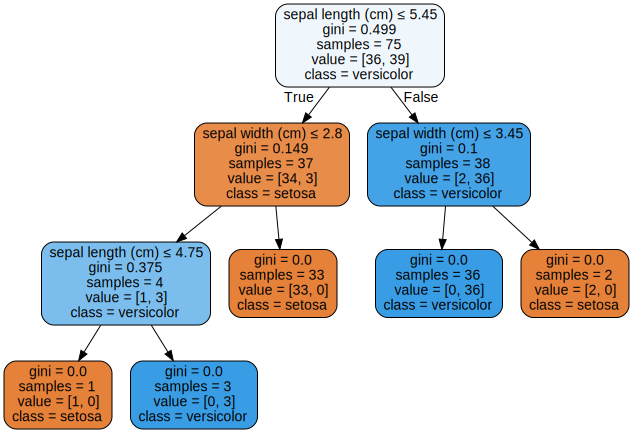

In [80]:
import graphviz

# export the dot data file into a variable
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=iris.feature_names[0:2],  
                                class_names=iris.target_names[0:2],  
                                filled=True, rounded=True,  
                                special_characters=True) 

# create the graph
graph = graphviz.Source(dot_data) 

# and display the graph
graph

There we go - graphviz has created the graph of how the decision tree algorithm has actually solved the problem - step by step. 

### Gini Index

Let's analyze how the Decision Tree algorith has made these decisions. First, let's create a scatter plot of our data.

Text(0, 0.5, 'Sepal Width')

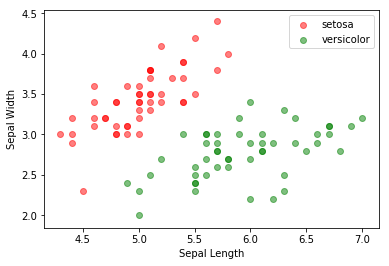

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(iris_sepal_data[0:50,0],iris_sepal_data[0:50,1], color="red",alpha=0.5,label="setosa")
plt.scatter(iris_sepal_data[50:100,0],iris_sepal_data[50:100,1], color="green",alpha=0.5,label="versicolor")
plt.legend()
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
# plt.axvline(6.0,color="red",linewidth=5,alpha=0.5)
# plt.axhline(2.8,color="red",linewidth=4,alpha=0.5)
# plt.axvline(5.35,color="red",linewidth=3,alpha=0.5)
# plt.axhline(3.2,color="red",linewidth=2,alpha=0.5)

The key parameters used by Decision Tree are either of the following

- gini index
- entropy

By default DecisionTreeClassifier uses the gini index to calculate the cut-offs. Let's focus on the gini index cost function.

Let's look at the first cut , 

<pre>
sepal length (cm) < = 5.45
</pre>

Let's do some calculations by hand. It will give us a better understanding of what is going on under the hood.

Formula to calculate Gini index is

# $ gini = 1 - \sum_{i} p_i^2 $

where p<sub>i</sub> is the probability of occurance of the i'th class. In our case, we have just 2 classes.
- setosa
- versicolor

<img src="./pics/decision-tree-first-cut.png"/>

The above visual demonstrates how the calculations have been done.

Initial gini index.

### $ 1 - \frac{50}{100}^2 - \frac{50}{100}^2  = 0.5 $

Gini indices after the first cut has been made.

### $ 1 - \frac{45}{51}^2 - \frac{6}{51}^2  = 0.208 $

### $ 1 - \frac{5}{49}^2 - \frac{44}{49}^2  = 0.183 $

so, gini index after the split is
<pre>
0.208 + 0.183 = 0.391
</pre>

which is less than the original gini index that we started with - 0.5

Now, the question arises, why did the first cut happen at sepal length <= 5.45 ?  Why not at 6.0 ? To understand this, let's actually make a cut at sepal length <= 6.0 and re-calculate the gini indices.

- **Identify the target counts by class**

In [52]:
iris_sepal_target[iris_sepal_data[:,0] <=6.0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [60]:
import numpy as np

np.unique(iris_sepal_target[iris_sepal_data[:,0] <=6.0], 
          return_counts = True)

(array([0, 1]), array([50, 30]))

- **Calculate the Gini Index**

### $ 1 - \frac{50}{80}^2 - \frac{30}{80}^2  = 0.468 $

<img src="./pics/decision-tree-arbitrary-cut.png"/>

The gini index at the new cut-off sepal length <= 6.0 is 0.468. It is not much different from where we initially started (0.5). By now, you should be able to understand the reasons behind the classifier's decision points.

#### Challenge

Try to calculate the gini index by hand(like above) when the sepal width <=2.75

Here is a visual of how decision tree algorithm has eventually solved the problem. 

<img src="./pics/decision-tree-solves-iris.png"/>

Now that we understand how decision trees work, let's try and predict some data. Let's first split our data into train/test datasets.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (iris_sepal_data, iris_sepal_target)

In [76]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
model      = classifier.fit(X_train, y_train)

In [77]:
y_predict = model.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print ( "confusion matrix = \n" , confusion_matrix(y_test, y_predict) )
print ( "accuracy score = ",accuracy_score(y_test,y_predict) )

confusion matrix = 
 [[14  0]
 [ 1 10]]
accuracy score =  0.96


Thats an accuracy score of 88%. Pretty decent. 

### Decision Trees for Regression